In [30]:
from flask_ml_client import MLClient
import cv2
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from tf_object_detection_util.inference_api import TFInference
import json
%matplotlib inline

In [21]:
client = MLClient(host='http://127.0.0.1:5000/')

In [22]:
def cv2_imread_rgb(uri:'str or pathlib.Path') -> np.ndarray:
    '''
    reads an image at the URI specified in "uri" as an RGB image 
    returns the output as a numpy ndarray of shape (height, width, 3)
    '''
    return cv2.cvtColor(cv2.imread(str(uri)), cv2.COLOR_BGR2RGB)

def load_faster_rcnn_open_images():
    MODEL_NAME = Path('/home/prasannals/models/research/object_detection/faster_rcnn_inception_resnet_v2_atrous_oid_v4_2018_12_12')
    PATH_TO_FROZEN_GRAPH = MODEL_NAME / 'frozen_inference_graph.pb'
    PATH_TO_LABELS = MODEL_NAME / 'oid_v4_label_map.pbtxt'

    inf = TFInference(PATH_TO_FROZEN_GRAPH, PATH_TO_LABELS)
    return inf

In [23]:
img =cv2_imread_rgb('/home/prasannals/test.jpg')
img.shape

(853, 1280, 3)

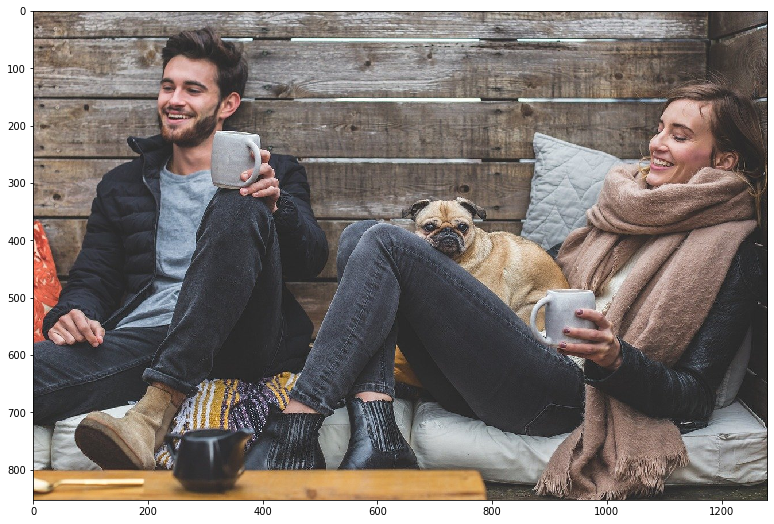

In [24]:
plt.figure(figsize=(16,9))
plt.imshow(img)

In [25]:
client.get_models()

['object_detection']

In [31]:
res = client.predict(img , 'object_detection')
res = json.loads(res)

In [27]:
inf = load_faster_rcnn_open_images()

In [33]:
vis = inf.visualize_pred(res, img)
vis.shape

(853, 1280, 3)

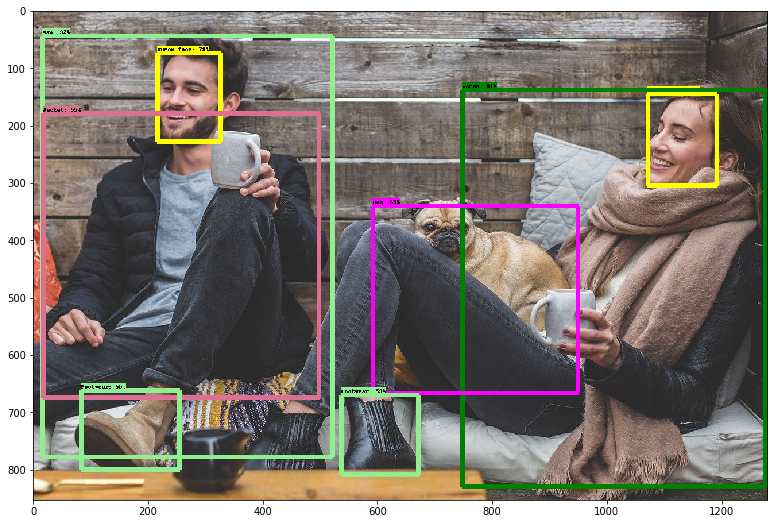

In [34]:
plt.figure(figsize=(16,9))
plt.imshow(vis)